In [8]:
import vinsgrad
import vinsgrad.nn as nn
import vinsgrad.functional as F
from vinsgrad.vision import datasets, transforms
from vinsgrad.utils.data import DataLoader
import matplotlib.pyplot as plt

In [9]:
# Define the transforms
transform_pipeline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    transforms.Flatten()
])

# Load the MNIST test dataset
test_dataset = datasets.MNIST(root='./mnist_data', train=False, download=True, transform=transform_pipeline)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [10]:
# Define the model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [11]:
# Load the best model
model = MLP()
best_model_path = 'checkpoints/mnist_mlp_best.pkl.gz'
model.load_state_dict(vinsgrad.load(best_model_path))
model.eval()

In [12]:
# Function to display image and prediction
def display_prediction(image, label, prediction):
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.title(f'True: {label}, Predicted: {prediction}')
    plt.axis('off')
    plt.show()

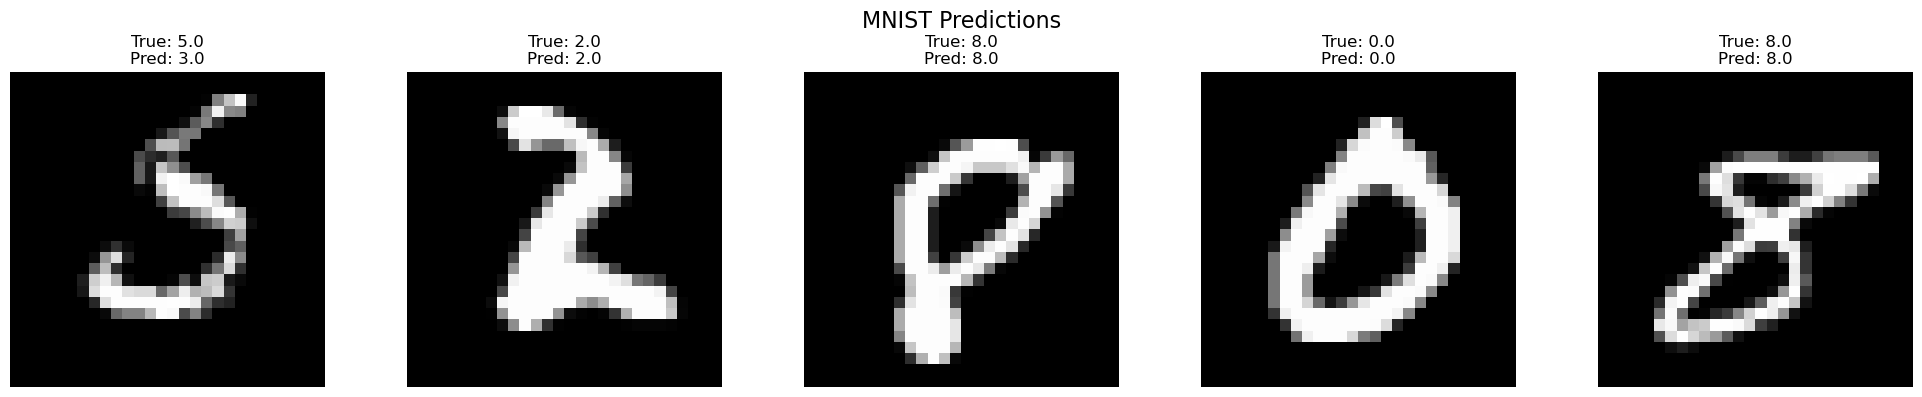

In [23]:
# Create a figure with 5 subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
fig.suptitle('MNIST Predictions', fontsize=16)

# Iterate through the test loader and get 5 images
for i, (image, label) in enumerate(test_loader):
    if i >= 5:
        break
    
    # Make prediction
    with vinsgrad.no_grad():
        output = model(image)
        probabilities = F.softmax(output, axis=1)
        prediction = vinsgrad.argmax(probabilities, axis=1).item()

    # Get true label
    true_label = vinsgrad.argmax(label, axis=1).item()
    
    # Display image and prediction
    image_display = image.data.reshape(28, 28)
    axes[i].imshow(image_display, cmap='gray')
    axes[i].set_title(f'True: {true_label}\nPred: {prediction}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()